<a href="https://colab.research.google.com/github/Francisco2963/M-tricas-de-Agrupamiento-K-means-y-DBSCAN-/blob/main/M%C3%A9tricas_de_Agrupamiento_(K_means_y_DBSCAN)_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('/content/CC GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [53]:
df.duplicated().sum()

0

In [54]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [55]:
df['CREDIT_LIMIT'].unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

In [56]:
# Rellenar valores nulos con la moda de la columna
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0])

In [57]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [58]:
df['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [59]:
df['MINIMUM_PAYMENTS'].sort_values()

,MINIMUM_PAYMENTS
1978,0.019163
7927,0.037744
3787,0.055880
8014,0.059481
1419,0.117036
...,...
8919,NaN
8929,NaN
8935,NaN
8944,NaN


In [60]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']].sort_values(by=['PAYMENTS', 'MINIMUM_PAYMENTS'])

,PAYMENTS,MINIMUM_PAYMENTS
3,0.00000,NaN
45,0.00000,NaN
47,0.00000,NaN
55,0.00000,NaN
56,0.00000,NaN
...,...,...
2159,39048.59762,5394.173671
5358,39461.96580,6764.853481
4668,40627.59524,2149.990102
550,46930.59824,2974.069421


In [61]:
num_filas_con_cero = len(df[df['PAYMENTS'] == 0])

print("Número de filas con PAYMENTS = 0:", num_filas_con_cero)

Número de filas con PAYMENTS = 0: 240


In [62]:
filas_con_cero = df[df['PAYMENTS'] == 0]

# Mostrar las filas
filas_con_cero

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.0,NaN,0.0,12
56,C10058,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,C19095,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.0,NaN,0.0,8
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.0,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.0,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.0,NaN,0.0,6


In [63]:
df['MINIMUM_PAYMENTS'] = np.where(df['PAYMENTS'] == 0, 0, df['MINIMUM_PAYMENTS'])

In [64]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [65]:
# Filtramos las filas donde MINIMUM_PAYMENTS es NaN
filas_con_nan = df[df['MINIMUM_PAYMENTS'].isnull()]

# Mostramos las filas con NaN que quedaron despues de la imputacion con 0
filas_con_nan

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


In [66]:
df['PRC_FULL_PAYMENT'].unique()

array([0.      , 0.222222, 1.      , 0.25    , 0.083333, 0.3     ,
       0.333333, 0.166667, 0.111111, 0.916667, 0.2     , 0.090909,
       0.454545, 0.181818, 0.444444, 0.636364, 0.5     , 0.75    ,
       0.142857, 0.888889, 0.545455, 0.818182, 0.363636, 0.833333,
       0.666667, 0.909091, 0.1     , 0.583333, 0.8     , 0.416667,
       0.4     , 0.125   , 0.714286, 0.6     , 0.571429, 0.375   ,
       0.9     , 0.285714, 0.7     , 0.272727, 0.777778, 0.875   ,
       0.727273, 0.428571, 0.625   , 0.857143, 0.555556])

In [67]:
df['MINIMUM_PAYMENTS'] = np.where((df['MINIMUM_PAYMENTS'].isnull()) & (df['PRC_FULL_PAYMENT'] == 0), 0, df['MINIMUM_PAYMENTS'])

In [68]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [70]:
# Función para identificar outliers usando el método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Aplicar la función a todas las columnas numéricas
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers en {col}: {outliers.shape[0]}")
    outliers

Outliers en BALANCE: 695
Outliers en BALANCE_FREQUENCY: 1493
Outliers en PURCHASES: 808
Outliers en ONEOFF_PURCHASES: 1013
Outliers en INSTALLMENTS_PURCHASES: 867
Outliers en CASH_ADVANCE: 1030
Outliers en PURCHASES_FREQUENCY: 0
Outliers en ONEOFF_PURCHASES_FREQUENCY: 782
Outliers en PURCHASES_INSTALLMENTS_FREQUENCY: 0
Outliers en CASH_ADVANCE_FREQUENCY: 525
Outliers en CASH_ADVANCE_TRX: 804
Outliers en PURCHASES_TRX: 766
Outliers en CREDIT_LIMIT: 248
Outliers en PAYMENTS: 808
Outliers en MINIMUM_PAYMENTS: 899
Outliers en PRC_FULL_PAYMENT: 1474
Outliers en TENURE: 1366


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

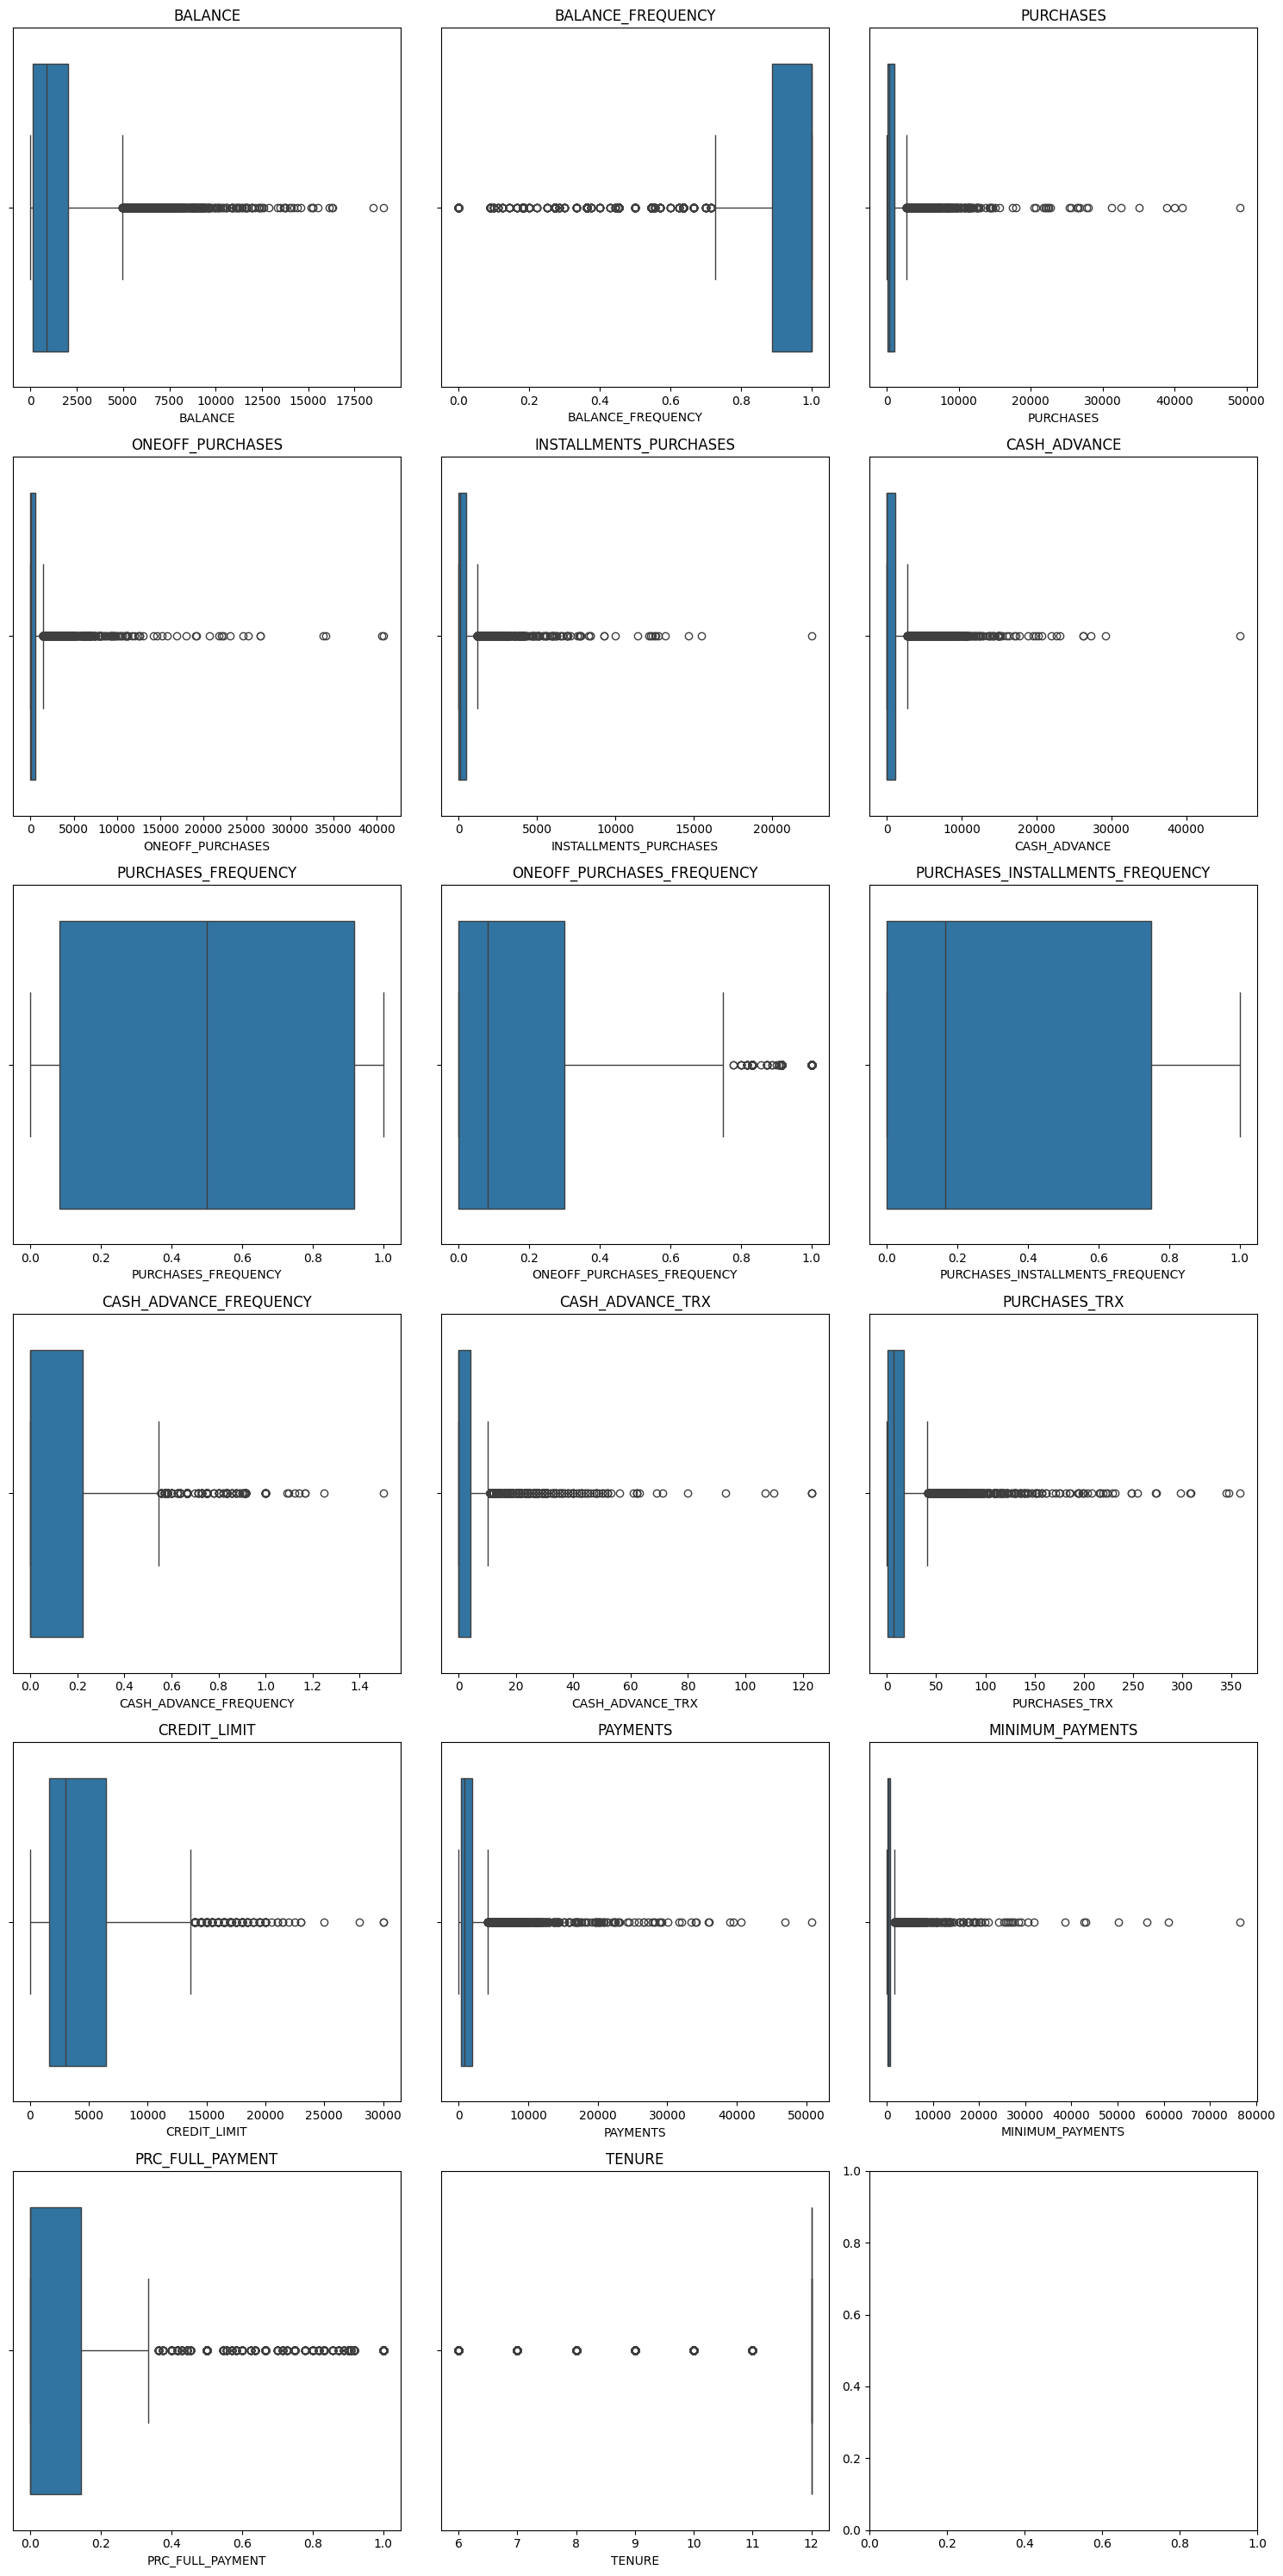

In [71]:
# Obtener las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3

# Crear una figura con el número correcto de filas y columnas
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar el array de axes para facilitar el acceso

# Iterar sobre las columnas numéricas y crear los boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustar el layout para eliminar los subplots vacíos
plt.tight_layout()
plt.show()

CUST_ID : Identificación del titular de la tarjeta de crédito (categórica)

BALANCE : Monto del saldo que queda en su cuenta para realizar compras (

BALANCE_FREQUENCY : Con qué frecuencia se actualiza el saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)

PURCHASES : Monto de las compras realizadas desde la cuenta

ONEOFF_PURCHASES : Monto máximo de compra realizada en una sola vez

INSTALLMENTS_PURCHASES : Monto de la compra realizada en cuotas

CASH_ADVANCE : Efectivo por adelantado otorgado por el usuario

PURCHASES_FREQUENCY : Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compra frecuente, 0 = no compra frecuente)

ONEOFFPURCHASESFREQUENCY : Con qué frecuencia se realizan las compras en una sola vez (1 = compra frecuente, 0 = no compra frecuente)

PURCHASESINSTALLMENTSFREQUENCY : Con qué frecuencia se realizan las compras en cuotas hecho (1 = hecho frecuentemente, 0 = no hecho frecuentemente)

CASHADVANCEFREQUENCY : Con qué frecuencia se paga el efectivo por adelantado

CASHADVANCETRX : Número de transacciones realizadas con "Efectivo por adelantado"

PURCHASES_TRX : Número de transacciones de compra realizadas

CREDIT_LIMIT : Límite de tarjeta de crédito para el usuario

PAYMENTS : Monto del pago realizado por el usuario

MINIMUM_PAYMENTS : Monto mínimo de pagos realizados por el usuario

PRCFULLPAYMENT : Porcentaje del pago total pagado por el usuario

TENURE : Duración del servicio de tarjeta de crédito para el usuario

In [72]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [73]:
# definir las columnas relevantes donde aplicar el método IQR
columns_to_transform = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                        'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Calcular Q1 y Q3
Q1 = df[columns_to_transform].quantile(0.25)
Q3 = df[columns_to_transform].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_no_outliers_iqr = df[~((df[columns_to_transform] < lower_bound) | (df[columns_to_transform] > upper_bound)).any(axis=1)]

# Verificar el tamaño del nuevo dataframe
print(f"Tamaño del dataframe original: {df.shape[0]}")
print(f"Tamaño del dataframe sin outliers (IQR): {df_no_outliers_iqr.shape[0]}")

Tamaño del dataframe original: 8950
Tamaño del dataframe sin outliers (IQR): 2987


In [74]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

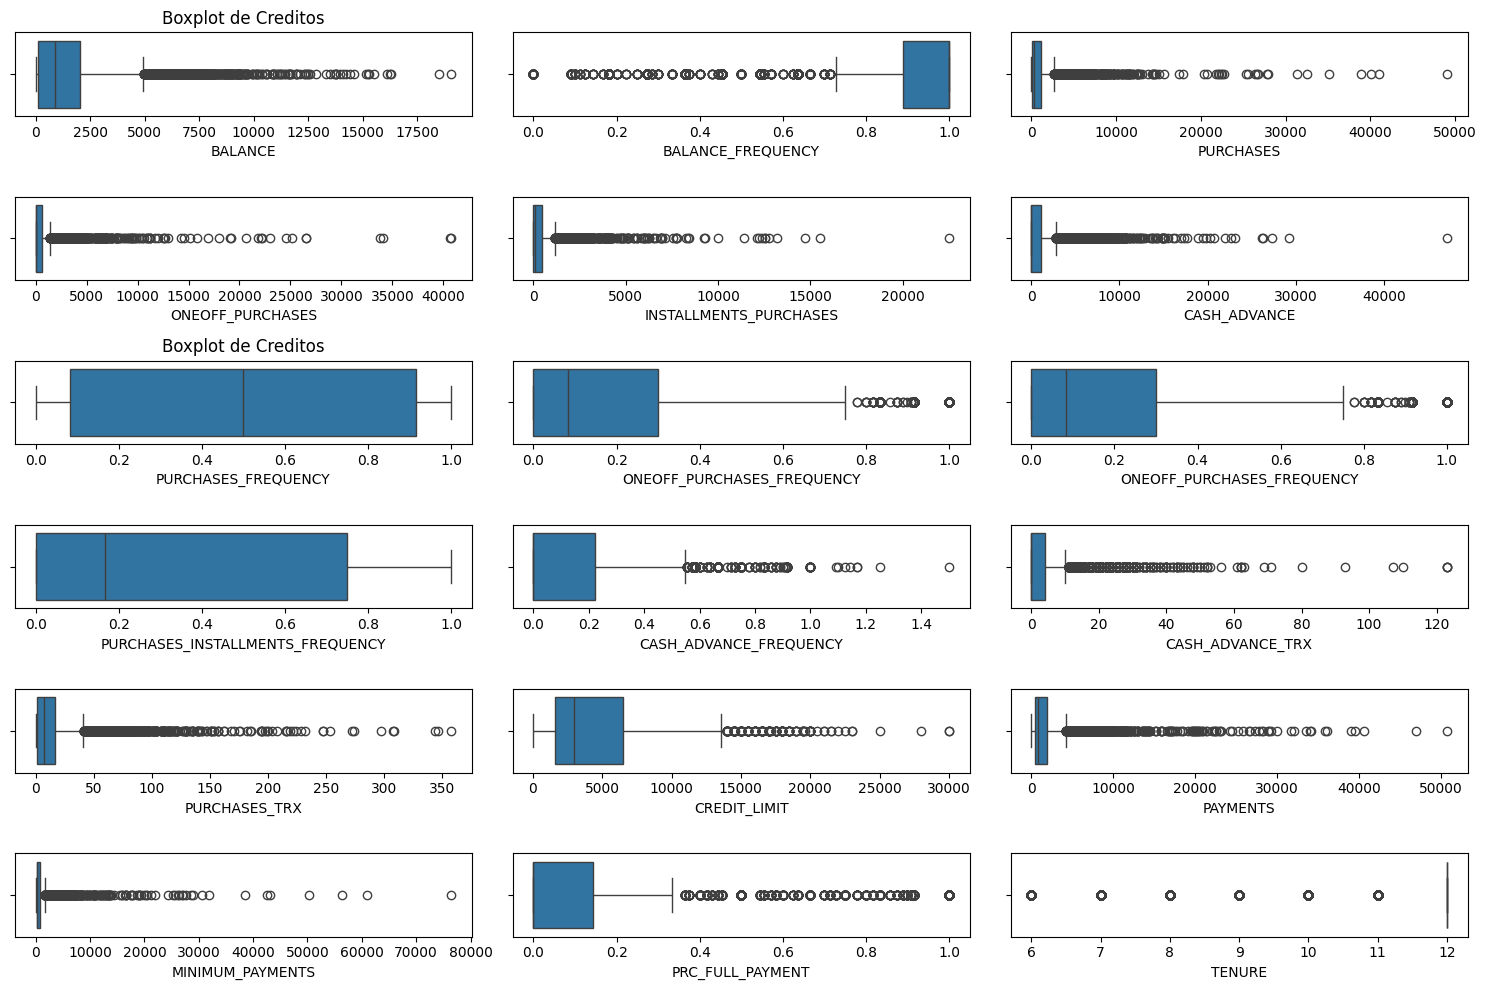

In [76]:
plt.figure(figsize=(15,10))

plt.subplot(6, 3, 1)
sns.boxplot(x=df['BALANCE'])
plt.title('Boxplot de Creditos')
plt.xlabel('BALANCE')

plt.subplot(6,3,2)
sns.boxplot(x=df['BALANCE_FREQUENCY'])
plt.xlabel('BALANCE_FREQUENCY')

plt.subplot(6,3,3)
sns.boxplot(x=df['PURCHASES'])
plt.xlabel('PURCHASES')

plt.subplot(6,3,4)
sns.boxplot(x=df['ONEOFF_PURCHASES'])
plt.xlabel('ONEOFF_PURCHASES')

plt.subplot(6,3,5)
sns.boxplot(x=df['INSTALLMENTS_PURCHASES'])
plt.xlabel('INSTALLMENTS_PURCHASES')

plt.subplot(6,3,6)
sns.boxplot(x=df['CASH_ADVANCE'])
plt.xlabel('CASH_ADVANCE')

plt.subplot(6, 3, 7)
sns.boxplot(x=df['PURCHASES_FREQUENCY'])
plt.title('Boxplot de Creditos')
plt.xlabel('PURCHASES_FREQUENCY')

plt.subplot(6,3,8)
sns.boxplot(x=df['ONEOFF_PURCHASES_FREQUENCY'])
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')

plt.subplot(6,3,9)
sns.boxplot(x=df['ONEOFF_PURCHASES_FREQUENCY'])
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')

plt.subplot(6,3,10)
sns.boxplot(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')

plt.subplot(6,3,11)
sns.boxplot(x=df['CASH_ADVANCE_FREQUENCY'])
plt.xlabel('CASH_ADVANCE_FREQUENCY')

plt.subplot(6,3,12)
sns.boxplot(x=df['CASH_ADVANCE_TRX'])
plt.xlabel('CASH_ADVANCE_TRX')

plt.subplot(6,3,13)
sns.boxplot(x=df['PURCHASES_TRX'])
plt.xlabel('PURCHASES_TRX')

plt.subplot(6,3,14)
sns.boxplot(x=df['CREDIT_LIMIT'])
plt.xlabel('CREDIT_LIMIT')

plt.subplot(6,3,15)
sns.boxplot(x=df['PAYMENTS'])
plt.xlabel('PAYMENTS')

plt.subplot(6,3,16)
sns.boxplot(x=df['MINIMUM_PAYMENTS'])
plt.xlabel('MINIMUM_PAYMENTS')

plt.subplot(6,3,17)
sns.boxplot(x=df['PRC_FULL_PAYMENT'])
plt.xlabel('PRC_FULL_PAYMENT')

plt.subplot(6,3,18)
sns.boxplot(x=df['TENURE'])
plt.xlabel('TENURE')
plt.tight_layout()

plt.show()

In [77]:
df['MINIMUM_PAYMENTS'].sort_values()

,MINIMUM_PAYMENTS
5782,0.00000
4649,0.00000
7300,0.00000
4697,0.00000
240,0.00000
...,...
5830,43132.72823
4462,50260.75947
5657,56370.04117
7132,61031.61860


In [78]:
df.iloc[4375:4377]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4375,C14498,1639.513143,1.0,1225.00,651.0,574.00,0.0,1.0,0.583333,1.0,0.0,0,24,1900.0,1467.532097,1476.718269,0.0,12
4376,C14499,10571.411070,1.0,7739.48,0.0,7739.48,0.0,1.0,0.000000,1.0,0.0,0,44,8000.0,2688.447014,76406.207520,0.0,12


In [79]:
fila = df.iloc[4376]  # Selecciona la fila 250 (índice 249)
fila

,4376
CUST_ID,C14499
BALANCE,10571.41107
BALANCE_FREQUENCY,1.0
PURCHASES,7739.48
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,7739.48
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,1.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,1.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Algoritmo K-means

Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [82]:
# Escalar los datos con StandardScaler
scaler = StandardScaler()
X = df.drop('CUST_ID', axis=1)  # Eliminamos la columna de ID del cliente para el clustering
X_scaled = scaler.fit_transform(X)

In [83]:
# Crear un nuevo dataframe escalado para trabajar
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [84]:
# Selección de características más relevantes para el análisis
# Estas características se eligieron por su relación con el comportamiento del cliente
X_relevant = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

In [85]:
# Escalar las variables seleccionadas
X_relevant_scaled = scaler.fit_transform(X_relevant)

In [86]:
# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes para visualización
X_pca = pca.fit_transform(X_relevant_scaled)

COMENTARIO

Usaremos PCA para ver si es posible manejar de mejor manera el exceso de ruido (outliers) que tiene este conjunto de datos.

<ipython-input-87-d24554e703ff>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='viridis')


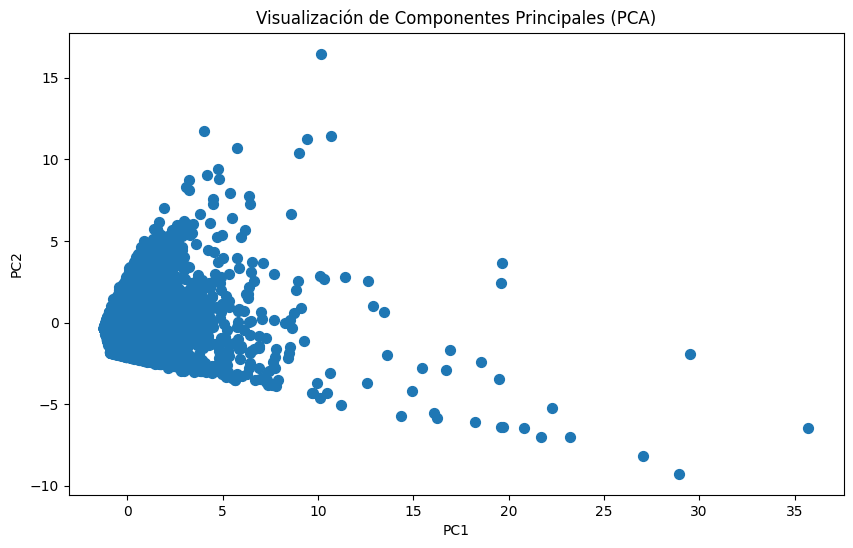

In [87]:
# Visualizar los resultados de PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='viridis')
plt.title("Visualización de Componentes Principales (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [88]:
# Implementación de K-means con diferentes valores de K para encontrar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_relevant_scaled)
    sse.append(kmeans.inertia_)

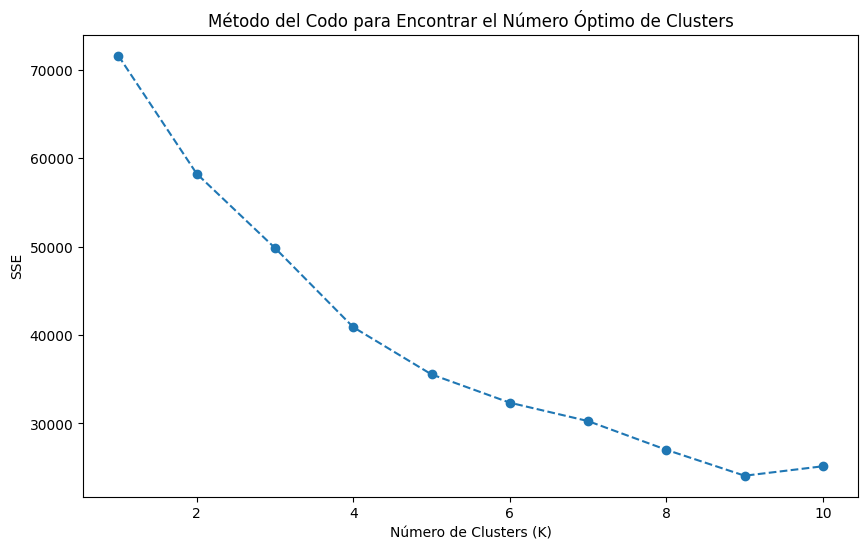

In [89]:
# Graficar el método del codo (Elbow Method) para identificar el número óptimo de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters')
plt.show()


COMENTARIO

El grafico del codo muestra que el mejor valor de k se encuentra entre 4 y 5 clusters

In [90]:
# Aplicar K-means con el número de clusters óptimo (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X_relevant_scaled)

In [91]:
# Calcular métricas de evaluación para K-means
inertia = kmeans.inertia_
sil_score = silhouette_score(X_relevant_scaled, y_kmeans)
db_index = davies_bouldin_score(X_relevant_scaled, y_kmeans)

print(f"Inercia: {inertia}")
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {db_index}")

Inercia: 40893.5544226364
Silhouette Score: 0.41962834960439016
Davies-Bouldin Index: 1.1764609899231422


COMENTARIO

En general, los resultados indican que los clusters formados tienen una calidad aceptable, pero no óptima. Los puntos más relevantes son:

Inercia (40893.55): Los clusters están bien compactados dentro de sí mismos.

Silhouette Score (0.42): Indica una separación moderada de los clusters y cierta superposición.

Davies-Bouldin Index (1.17): Sugiere que hay cierta dispersión dentro de los clusters, y que la separación entre clusters podría mejorarse.

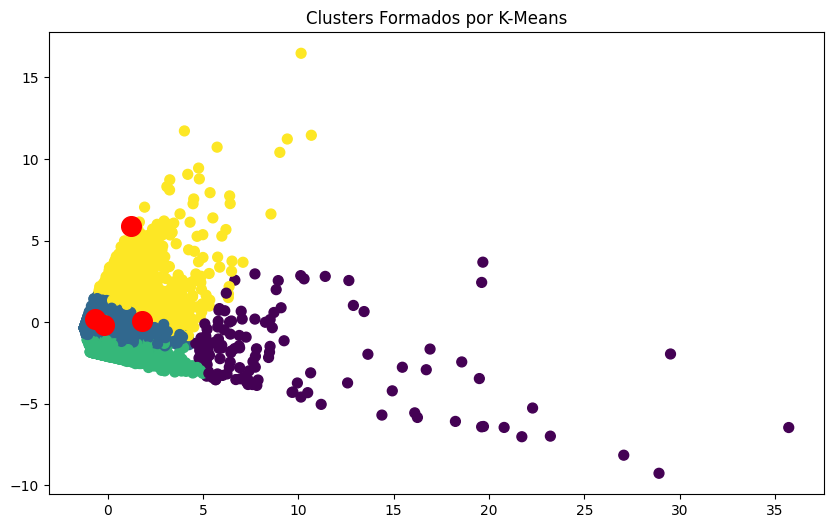

In [92]:
# Visualización de los clusters usando los componentes principales de PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por K-Means")
plt.show()

COMENTARIO

se visualizan los clusters formados por K-means en base a los componentes principales (PCA).

Los colores representan los diferentes clusters identificados. Se observa una clara segmentación en cuatro grupos, lo cual coincide con el valor óptimo identificado por el método del codo.

Sin embargo, se puede notar que algunos puntos aún están dispersos en lugar de agruparse, indicando que K-means pudo no haber segmentado completamente los datos

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [93]:
# Aplicar DBSCAN con diferentes parámetros para ver su comportamiento

# DBSCAN con parámetros iniciales
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_relevant_scaled)

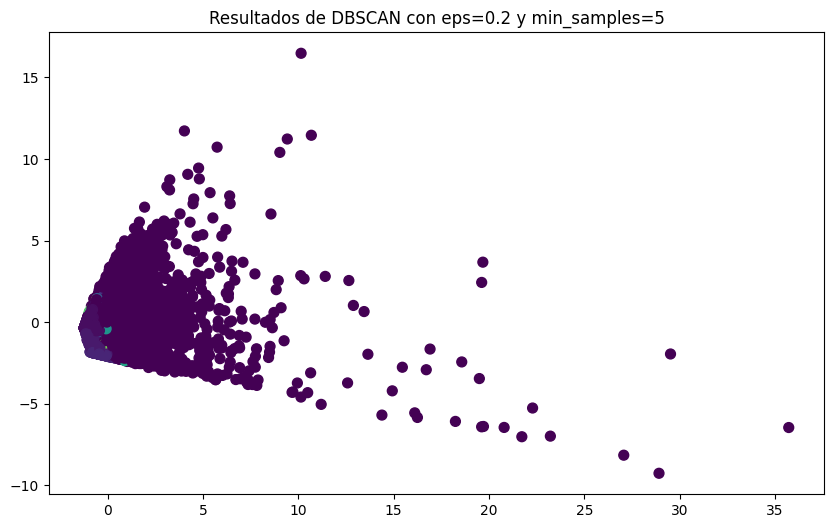

In [94]:
# Visualizar los resultados de DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.2 y min_samples=5")
plt.show()

COMENTARIO

Gráfico 1: DBSCAN con eps=0.2 y min_samples=5

Genera un gran número de puntos identificados como ruido (en color púrpura).

In [95]:
# Aplicar DBSCAN con un valor de eps mayor
dbscan_eps_high = DBSCAN(eps=0.5, min_samples=5)
labels_eps_high = dbscan_eps_high.fit_predict(X_relevant_scaled)


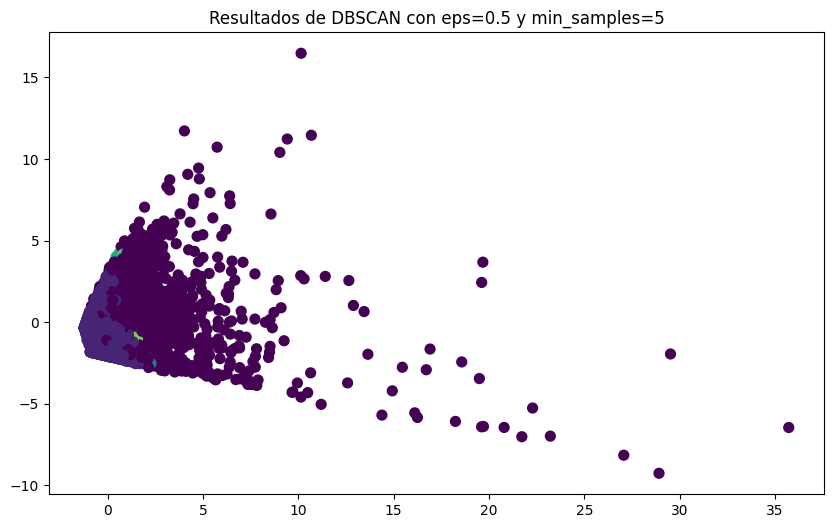

In [96]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_eps_high, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.5 y min_samples=5")
plt.show()

COMENTARIO

Gráfico 2: DBSCAN con eps=0.5 y min_samples=5

Mejora la agrupación, pero aún existen muchos puntos clasificados como ruido.

In [97]:
# Aplicar DBSCAN con un valor de min_samples mayor
dbscan_min_samples_high = DBSCAN(eps=0.5, min_samples=20)
labels_min_samples_high = dbscan_min_samples_high.fit_predict(X_relevant_scaled)

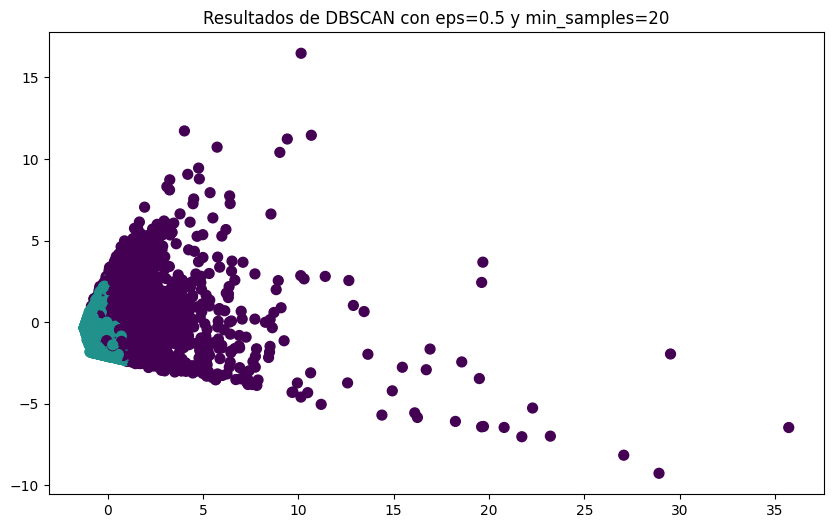

In [98]:
# Visualizar los resultados de DBSCAN con más muestras
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_min_samples_high, cmap='viridis', s=50)
plt.title("Resultados de DBSCAN con eps=0.5 y min_samples=20")
plt.show()

COMENTARIO

Gráfico 3: DBSCAN con eps=0.5 y min_samples=20

Muestra resultados más compactos en los clusters, con menos ruido. Sin embargo, aún se observan varios puntos sueltos.

In [99]:
# Comparación de métricas de evaluación entre K-means y DBSCAN
sil_score_dbscan = silhouette_score(X_relevant_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
db_index_dbscan = davies_bouldin_score(X_relevant_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1

print(f"Silhouette Score de DBSCAN (eps=0.2, min_samples=5): {sil_score_dbscan}")
print(f"Davies-Bouldin Index de DBSCAN (eps=0.2, min_samples=5): {db_index_dbscan}")

Silhouette Score de DBSCAN (eps=0.2, min_samples=5): -0.36911177788437444
Davies-Bouldin Index de DBSCAN (eps=0.2, min_samples=5): 1.5081455989294372


COMENTARIO

DBSCAN (eps=0.2, min_samples=5): Silhouette Score negativo y Davies-Bouldin Index elevado, lo que indica que no se formaron clusters bien definidos.

COMENTARIO FINAL

K-Means:

Visualmente, se observan varios clusters bien definidos, lo cual concuerda con el número óptimo de clusters encontrado mediante el método del codo (ELEJIMOS 4 CLUSTERS).

El Silhouette Score moderado indica que los clusters son aceptables, y el Davies-Bouldin Index no es demasiado alto, lo que sugiere que los clusters están razonablemente bien separados.


DBSCAN:

La mayoría de los puntos están asignados a un gran cluster con algunos puntos dispersos clasificados como ruido, lo que sugiere que DBSCAN no pudo capturar correctamente las agrupaciones en el dataset.

Los parámetros de eps y min_samples parecen no tener un gran impacto, lo cual indica que la estructura de los datos no es adecuada para DBSCAN o que se necesita ajustar más los parámetros.

Decisión Final:

En este caso, parece que K-Means tuvo un mejor rendimiento en términos de la identificación de clusters. Logró capturar mejor la estructura de los datos, mientras que DBSCAN solo identificó un cluster principal con muchos puntos clasificados como ruido, este resultado de identificar mucho ruido puede deverse a la decision de no tratar en mayor profundidad los outliers en el conjunto de datos.